# Installing and Using Pandas

In [29]:
import pandas
pandas.__version__

'0.23.4'

In [30]:
import pandas as pd

# Introducing Pandas Objects

In [31]:
import numpy as np
import pandas as pd

In [32]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [33]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [34]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [35]:
data[1]

0.5

In [36]:
data[1:3]

1    0.50
2    0.75
dtype: float64

## Series as generalized NumPy array

In [37]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [38]:
data['b']

0.5

In [39]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [40]:
data[5]

0.5

In [41]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [42]:
population['California']

38332521

In [43]:
population['California':'Illinois']

California    38332521
Florida       19552860
Illinois      12882135
dtype: int64

## Constructing Series objects

In [44]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

In [45]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [46]:
pd.Series({2:'a', 1:'b', 3:'c'})

1    b
2    a
3    c
dtype: object

In [47]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

# The Pandas DataFrame Object

## DataFrame as a generalized NumPy array

In [48]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
dtype: int64

In [49]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [50]:
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

In [51]:
states.columns

Index(['area', 'population'], dtype='object')

## DataFrame as specialized dictionary

In [52]:
states['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

## Constructing DataFrame objects

In [53]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Florida,19552860
Illinois,12882135
New York,19651127
Texas,26448193


In [54]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [55]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [56]:
pd.DataFrame({'population': population,
              'area': area})

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [57]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.139669,0.618947
b,0.536837,0.714554
c,0.975794,0.391638


In [58]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [59]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


# The Pandas Index Object

In [60]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

## Index as immutable array

In [61]:
ind[1]

3

In [62]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [63]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [64]:
ind[1] = 0

TypeError: Index does not support mutable operations

## Index as ordered set

In [65]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [66]:
indA & indB  # intersection

Int64Index([3, 5, 7], dtype='int64')

In [67]:
indA | indB  # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [68]:
indA ^ indB  # symmetric difference

Int64Index([1, 2, 9, 11], dtype='int64')

# Data Selection in Series

## Series as dictionary

In [69]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [70]:
data['b']

0.5

In [71]:
'a' in data

True

In [72]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [73]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [74]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

## Series as one-dimensional array

In [75]:
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [76]:
# slicing by implicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [77]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [78]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

In [79]:
## Indexers: loc, iloc, and ix

In [80]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [81]:
# explicit index when indexing
data[1]

'a'

In [82]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

In [83]:
data.loc[1]

'a'

In [84]:
data.loc[1:3]

1    a
3    b
dtype: object

In [85]:
data.iloc[1]

'b'

In [86]:
data.iloc[1:3]

3    b
5    c
dtype: object

# Data Selection in DataFrame

## DataFrame as a dictionary

In [87]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [88]:
data['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [89]:
data.area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [90]:
data.area is data['area']

True

In [91]:
data.pop is data['pop']

False

In [92]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


## DataFrame as two-dimensional array

In [93]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01]])

In [94]:
data.T

,California,Florida,Illinois,New York,Texas
area,4.239670e+05,1.703120e+05,1.499950e+05,1.412970e+05,6.956620e+05
pop,3.833252e+07,1.955286e+07,1.288214e+07,1.965113e+07,2.644819e+07
density,9.041393e+01,1.148061e+02,8.588376e+01,1.390767e+02,3.801874e+01


In [95]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [96]:
data['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [97]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [98]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [99]:
data.ix[:3, :'pop']

/home/simon/cour/M2I2L/cour_python/p3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [100]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
Florida,19552860,114.806121
New York,19651127,139.076746


In [101]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


## Additional indexing conventions

In [102]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [103]:
data[1:3]

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [104]:
data[data.density > 100]

,area,pop,density
Florida,170312,19552860,114.806121
New York,141297,19651127,139.076746


## Ufuncs: Index Preservation

In [105]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [106]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [107]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [108]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


# UFuncs: Index Alignment

## Index alignment in Series

In [109]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [110]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [111]:
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [112]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [113]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

## Index alignment in DataFrame

In [114]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,1,11
1,5,1


In [115]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [116]:
A + B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [117]:
fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


# Ufuncs: Operations Between DataFrame and Series

In [118]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [119]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [120]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [121]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [122]:
halfrow = df.iloc[0, ::2]
halfrow

Q    3
S    2
Name: 0, dtype: int64

In [123]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


# Handling Missing Data

## Missing Data in Pandas

In [124]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [127]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
60.4 ms ± 2.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
1.65 ms ± 9.95 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



In [128]:
vals1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [129]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

In [130]:
1 + np.nan

nan

In [131]:
0 *  np.nan

nan

In [132]:
vals2.sum(), vals2.min(), vals2.max()

/home/simon/cour/M2I2L/cour_python/p3/lib/python3.5/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/home/simon/cour/M2I2L/cour_python/p3/lib/python3.5/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


(nan, nan, nan)

In [133]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

## NaN and None in Pandas

In [134]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [135]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [136]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

## Operating on Null Values

### Detecting null values

In [137]:
data = pd.Series([1, np.nan, 'hello', None])

In [138]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [139]:
data[data.notnull()]

0        1
2    hello
dtype: object

### Dropping null values

In [140]:
data.dropna()

0        1
2    hello
dtype: object

In [141]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [142]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [143]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [144]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [145]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [146]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


### Filling null values

In [147]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [148]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [149]:
# forward-fill
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [150]:
# back-fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [151]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [152]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


# Hierarchical Indexing

## A Multiply Indexed Series

### The bad way

In [153]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [154]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [155]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

### The Better Way: Pandas MultiIndex

In [156]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [157]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [158]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

### MultiIndex as extra dimension

In [159]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [160]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [161]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [162]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


## Methods of MultiIndex Creation

In [163]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.889221  0.056614
  2  0.503886  0.662502
b 1  0.268286  0.883500
  2  0.529592  0.391528

In [164]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### Explicit MultiIndex constructors

In [165]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [166]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [167]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [168]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

### MultiIndex level names

In [169]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### MultiIndex for columns

In [170]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      39.0  35.0  20.0  35.9  40.0  37.3
     2      37.0  36.9  50.0  38.0  36.0  37.5
2014 1      29.0  37.2  27.0  37.2  29.0  36.4
     2      36.0  37.9  34.0  35.5  59.0  37.2

In [171]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      20.0  35.9
     2      50.0  38.0
2014 1      27.0  37.2
     2      34.0  35.5

## Indexing and Slicing a MultiIndex

### Multiply indexed Series

In [172]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [173]:
pop['California', 2000]

33871648

In [174]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [175]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [176]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [177]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [178]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

### Multiply indexed DataFrames

In [179]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      39.0  35.0  20.0  35.9  40.0  37.3
     2      37.0  36.9  50.0  38.0  36.0  37.5
2014 1      29.0  37.2  27.0  37.2  29.0  36.4
     2      36.0  37.9  34.0  35.5  59.0  37.2

In [180]:
health_data['Guido', 'HR']

year  visit
2013  1        20.0
      2        50.0
2014  1        27.0
      2        34.0
Name: (Guido, HR), dtype: float64

In [181]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      39.0  35.0
     2      37.0  36.9

In [182]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        39.0
      2        37.0
2014  1        29.0
      2        36.0
Name: (Bob, HR), dtype: float64

In [183]:
health_data.loc[(:, 1), (:, 'HR')]

SyntaxError: invalid syntax (<ipython-input-183-fb34fa30ac09>, line 1)

In [184]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,39.0,20.0,40.0
2014,1,29.0,27.0,29.0


## Rearranging Multi-Indices

### Sorted and unsorted indices

In [185]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.349185
      2      0.865028
c     1      0.393017
      2      0.306970
b     1      0.134066
      2      0.794307
dtype: float64

In [186]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [187]:
data = data.sort_index()
data

char  int
a     1      0.349185
      2      0.865028
b     1      0.134066
      2      0.794307
c     1      0.393017
      2      0.306970
dtype: float64

In [188]:
data['a':'b']

char  int
a     1      0.349185
      2      0.865028
b     1      0.134066
      2      0.794307
dtype: float64

In [189]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [190]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [191]:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### Index setting and resetting

In [192]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [193]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

## Data Aggregations on Multi-Indices

In [194]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      39.0  35.0  20.0  35.9  40.0  37.3
     2      37.0  36.9  50.0  38.0  36.0  37.5
2014 1      29.0  37.2  27.0  37.2  29.0  36.4
     2      36.0  37.9  34.0  35.5  59.0  37.2

In [195]:
data_mean = health_data.mean(level='year')
data_mean

subject   Bob        Guido          Sue      
type       HR   Temp    HR   Temp    HR  Temp
year                                         
2013     38.0  35.95  35.0  36.95  38.0  37.4
2014     32.5  37.55  30.5  36.35  44.0  36.8

In [196]:
data_mean.mean(axis=1, level='type')

type,HR,Temp
year,,
2013,37.000000,36.766667
2014,35.666667,36.900000


# Combining Datasets: Concat and Append

In [197]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [198]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Recall: Concatenation of NumPy Arrays

In [199]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [200]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

## Simple Concatenation with pd.concat

In [201]:
# Signature in Pandas v0.18
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)

NameError: name 'objs' is not defined

In [202]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [203]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [204]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis='col')")

ValueError: No axis named col for object type <class 'pandas.core.frame.DataFrame'>

ValueError: No axis named col for object type <class 'pandas.core.frame.DataFrame'>

### Duplicate indices

In [205]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


### Catching the repeats as an error

In [206]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


### Ignoring the index

In [207]:
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


### Adding MultiIndex keys

In [208]:
display('x', 'y', "pd.concat([x, y], keys=['x', 'y'])")

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x, y], keys=['x', 'y'])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

### Concatenation with joins

In [209]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

/home/simon/cour/M2I2L/cour_python/p3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

In [210]:
display('df5', 'df6',
        "pd.concat([df5, df6], join='inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

In [211]:
display('df5', 'df6',
        "pd.concat([df5, df6], join_axes=[df5.columns])")

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
,B,C,D
3,B3,C3,D3
4,B4,C4,D4
,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,NaN,B3,C3
4,NaN,B4,C4


## The append() method

In [212]:
display('df1', 'df2', 'df1.append(df2)')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


# Combining Datasets: Merge and Join

In [213]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Categories of Joins

### One-to-one joins

In [214]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [215]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


### Many-to-one joins

In [216]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

### Many-to-many joins

In [217]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


## Specification of the Merge Key

### The on keyword

In [218]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

## The left_on and right_on keywords

In [219]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

In [220]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


## The left_index and right_index keywords

In [221]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [222]:
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [223]:
display('df1a', 'df2a', 'df1a.join(df2a)')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [224]:
display('df1a', 'df3', "pd.merge(df1a, df3, left_index=True, right_on='name')")

df1a
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1a, df3, left_index=True, right_on='name')
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000

## Specifying Set Arithmetic for Joins

In [225]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

In [226]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [227]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

In [228]:
display('df6', 'df7', "pd.merge(df6, df7, how='left')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='left')
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine

## Overlapping Column Names: The suffixes Keyword

In [229]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

In [230]:
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

## Example: US States Data

In [233]:
pop = pd.read_csv('../data/state-population.csv')
areas = pd.read_csv('../data/state-areas.csv')
abbrevs = pd.read_csv('../data/state-abbrevs.csv')
display('pop.head()', 'areas.head()', 'abbrevs.head()')

pop.head()
  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

areas.head()
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

abbrevs.head()
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

In [234]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [235]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [236]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [237]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [238]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [239]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [240]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [241]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [242]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [243]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [244]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [245]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [246]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

# Aggregation and Grouping

In [247]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Planets Data

In [264]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [265]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## Simple Aggregation in Pandas

In [266]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [267]:
ser.sum()

2.811925491708157

In [268]:
ser.mean()

0.5623850983416314

In [269]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [270]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [271]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [272]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


## GroupBy: Split, Apply, Combine

### Split, apply, combine

In [273]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [274]:
df.groupby('key')

In [275]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


## The GroupBy object

### Column indexing

In [276]:
planets.groupby('method')

In [277]:
planets.groupby('method')['orbital_period']

In [278]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [279]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


### Dispatch methods

In [280]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.000000
       Eclipse Timing Variations           9.000000
       Imaging                            38.000000
       Microlensing                       23.000000
       Orbital Brightness Modulation       3.000000
       Pulsar Timing                       5.000000
       Pulsation Timing Variations         1.000000
       Radial Velocity                   553.000000
       Transit                           397.000000
       Transit Timing Variations           4.000000
mean   Astrometry                       2011.500000
       Eclipse Timing Variations        2010.000000
       Imaging                          2009.131579
       Microlensing                     2009.782609
       Orbital Brightness Modulation    2011.666667
       Pulsar Timing                    1998.400000
       Pulsation Timing Variations      2007.000000
       Radial Velocity                  2007.518987
       Transit             

## Aggregate, filter, transform, apply

In [281]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


### Aggregation

In [282]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [283]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


### Filtering

In [284]:
def filter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

### Transformation

In [285]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


### The apply() method

In [286]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3


## Specifying the split key

### A list, array, series, or index providing the grouping keys

In [287]:
L = [0, 1, 0, 1, 2, 0]
display('df', 'df.groupby(L).sum()')

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(L).sum()
   data1  data2
0      7     17
1      4      3
2      4      7

In [288]:
display('df', "df.groupby(df['key']).sum()")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(df['key']).sum()
     data1  data2
key              
A        3      8
B        5      7
C        7     12

### A dictionary or series mapping index to group

In [289]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
consonant,12,19
vowel,3,8


### Any Python function

In [290]:
display('df2', 'df2.groupby(str.lower).mean()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
a,1.5,4.0
b,2.5,3.5


### A list of valid keys

In [291]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


## Grouping example

In [292]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# Pivot Tables

## Motivating Pivot Tables

In [293]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [294]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Pivot Tables by Hand

In [295]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [296]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## Pivot Table Syntax

In [297]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### Multi-level pivot tables

In [298]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [299]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

### Additional pivot table options

In [300]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [301]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


## Example: Birthrate Data

In [304]:
births = pd.read_csv('../data/birth.csv')

In [305]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [306]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


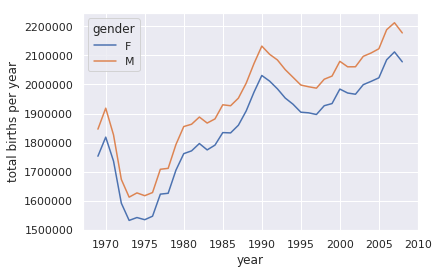

In [307]:
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

## Further data exploration

In [308]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [309]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [310]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

In [311]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

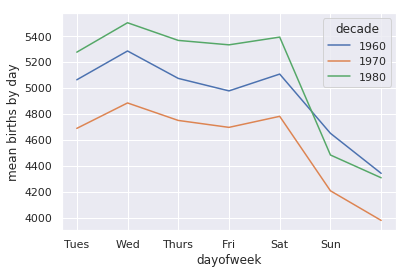

In [312]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [313]:
births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [314]:
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


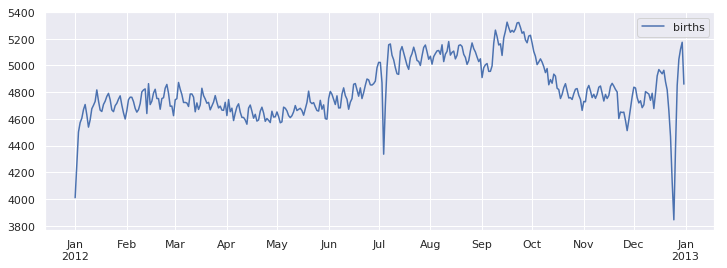

In [315]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);